Dataset source : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
<br>Dataset Link : https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
#Find the null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
#Check for categorical datatypes
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [10]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [11]:
numerical_columns=df.columns[df.dtypes!='object']

<Axes: >

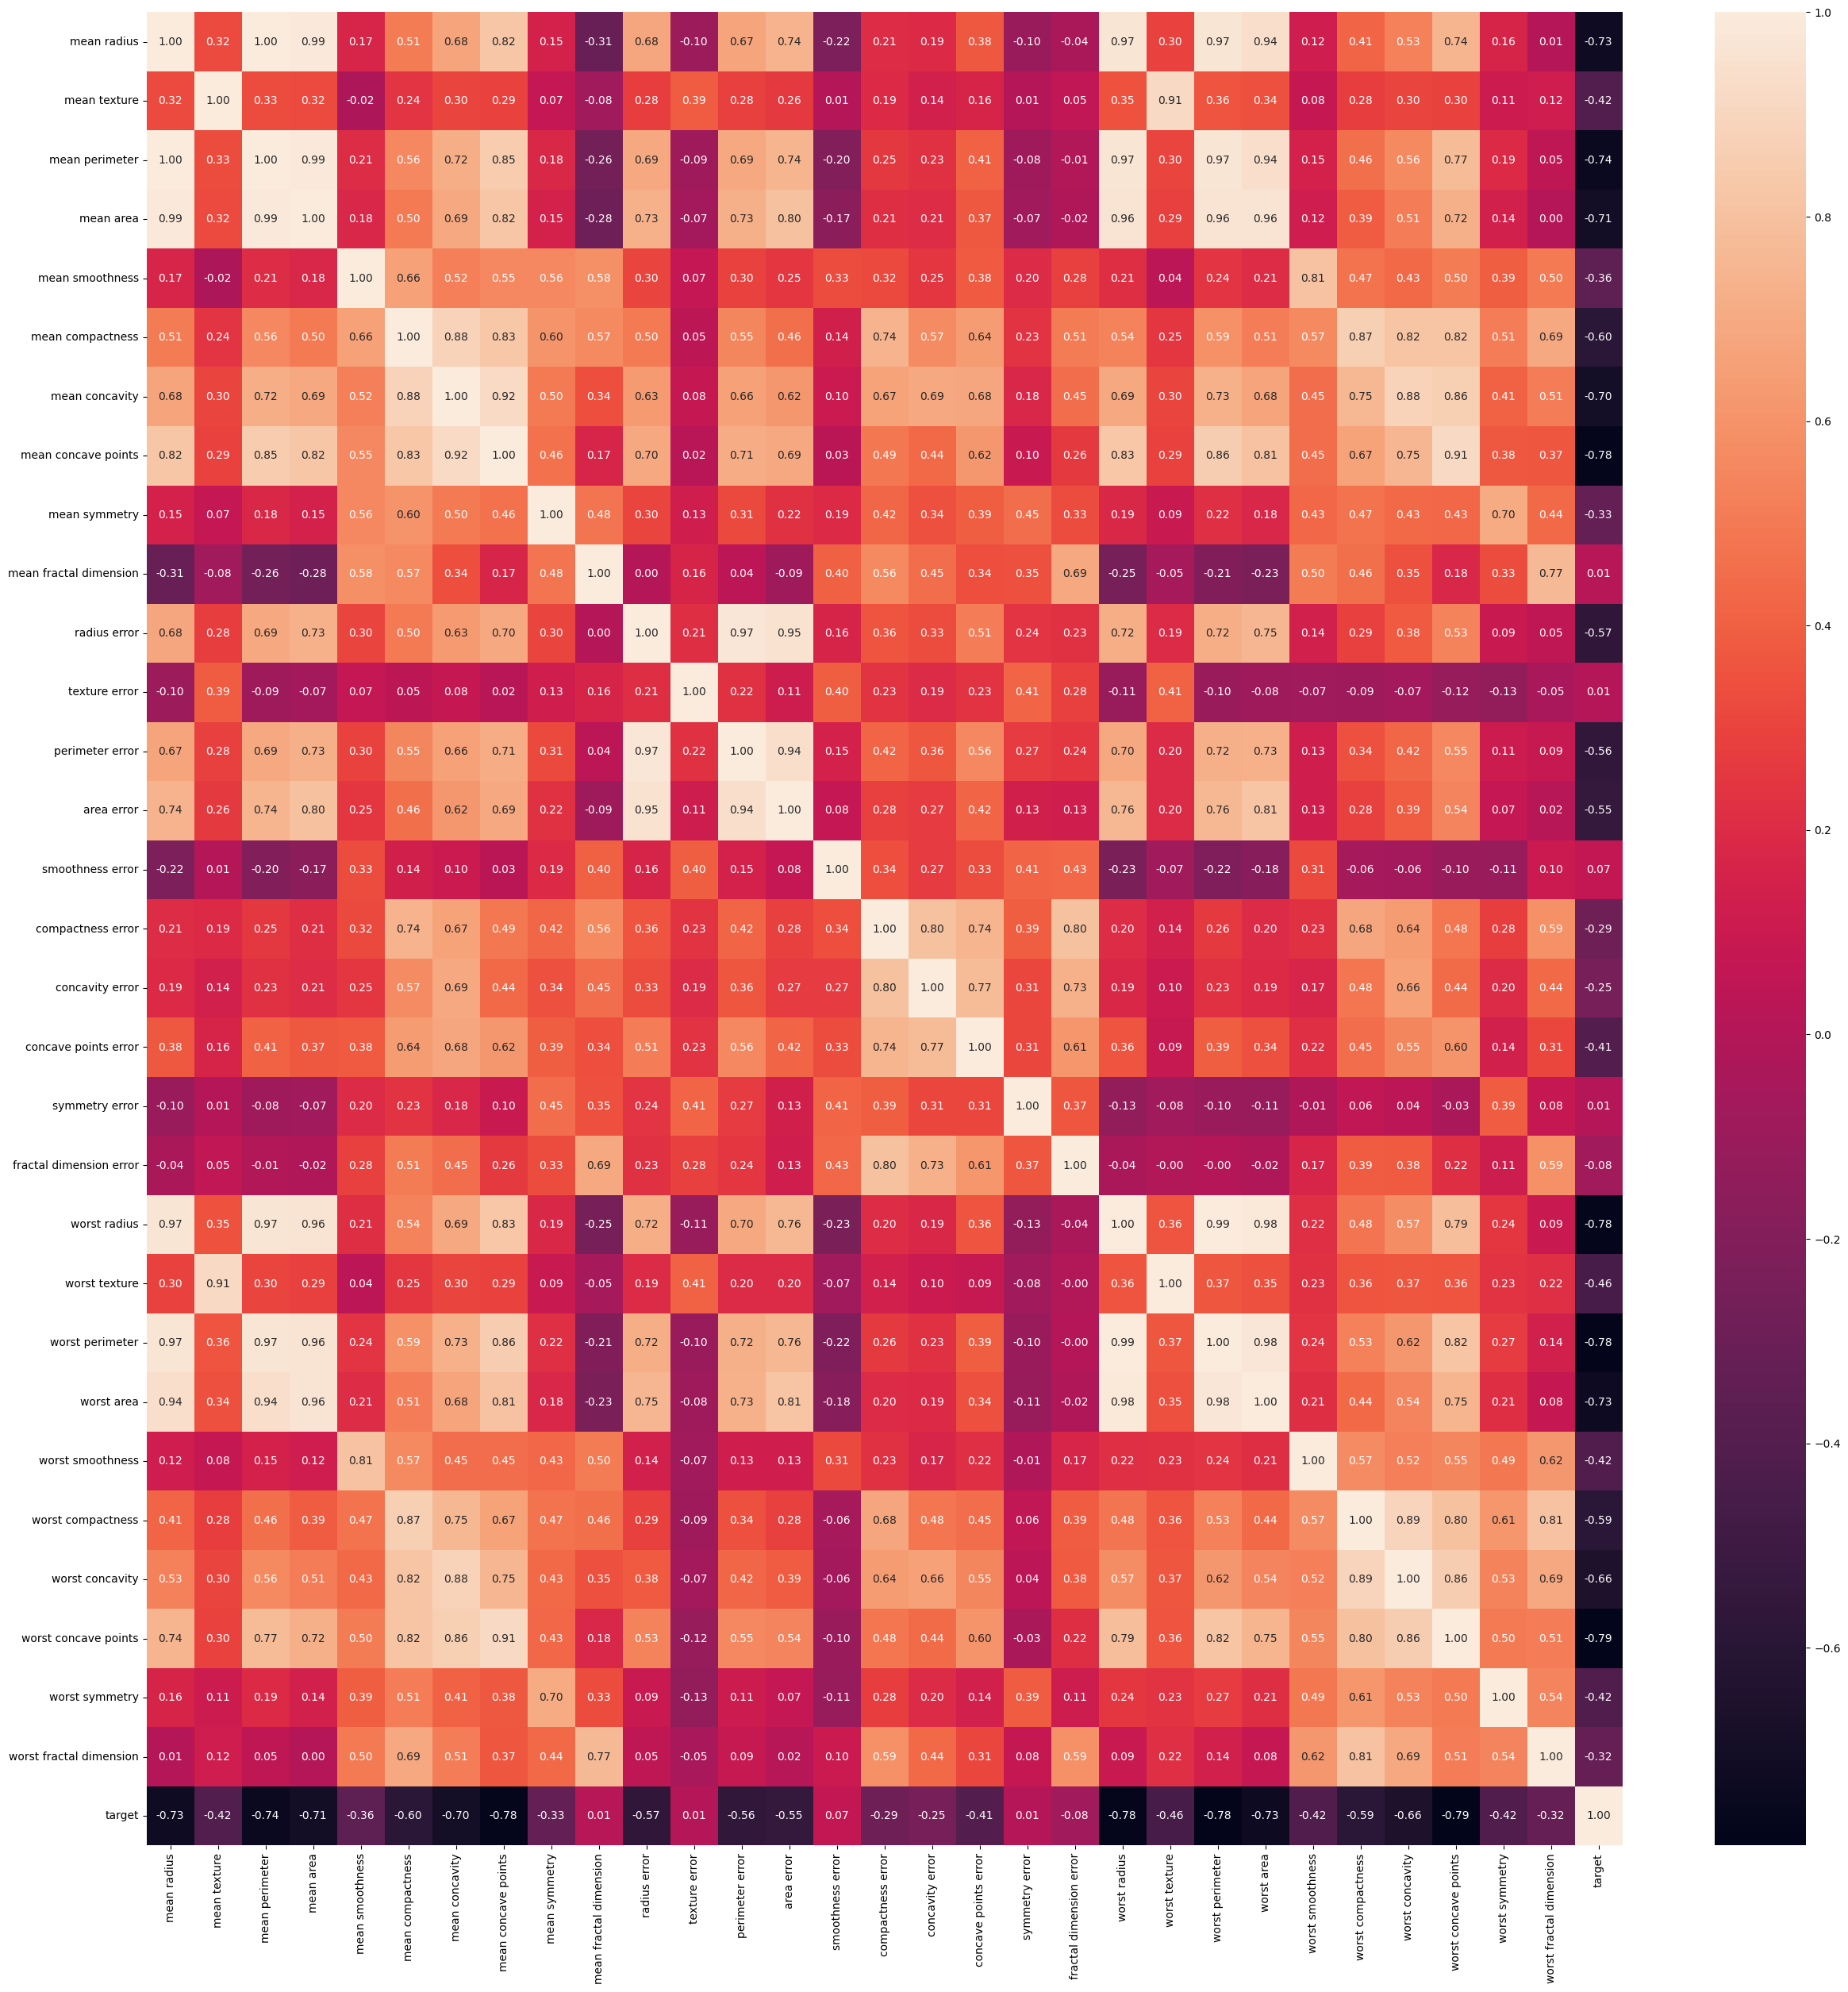

In [12]:
plt.figure(figsize=(30,30))
sns.heatmap(df[numerical_columns].corr(),annot=True,fmt = ".2f")

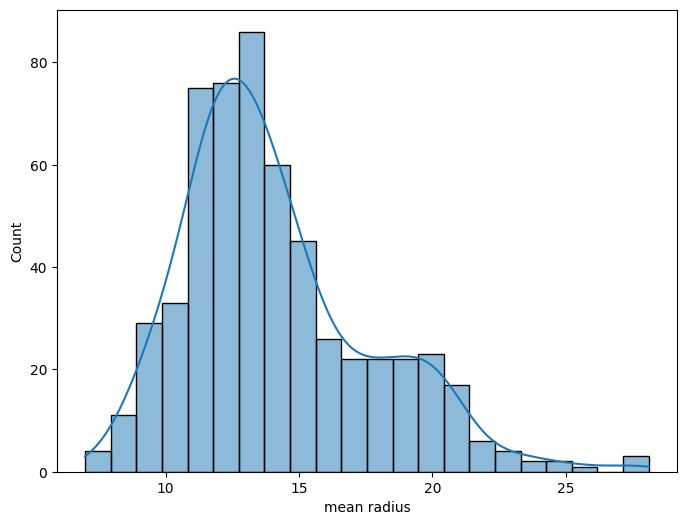

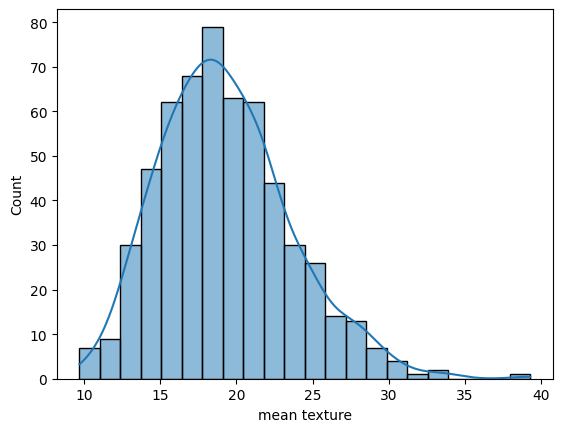

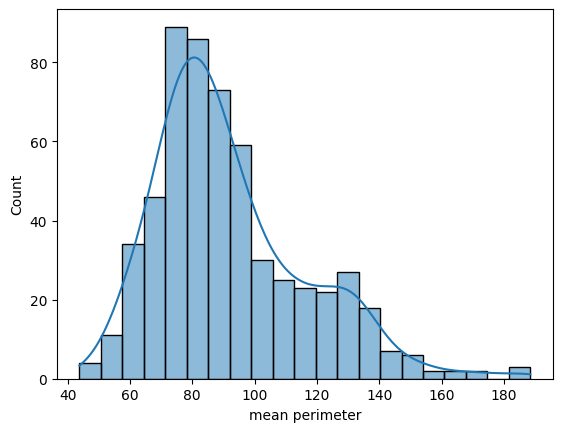

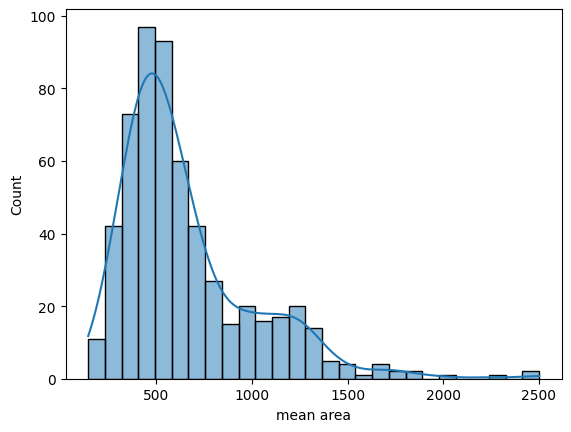

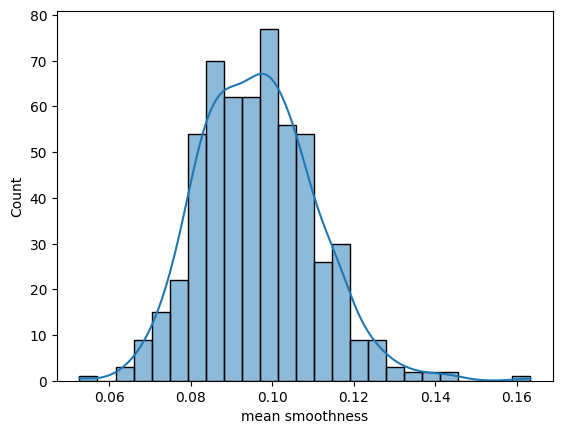

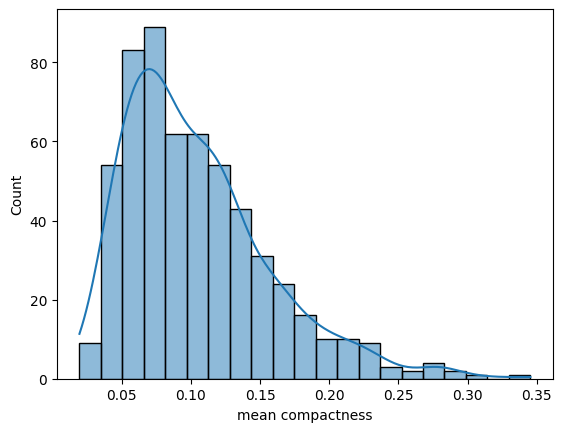

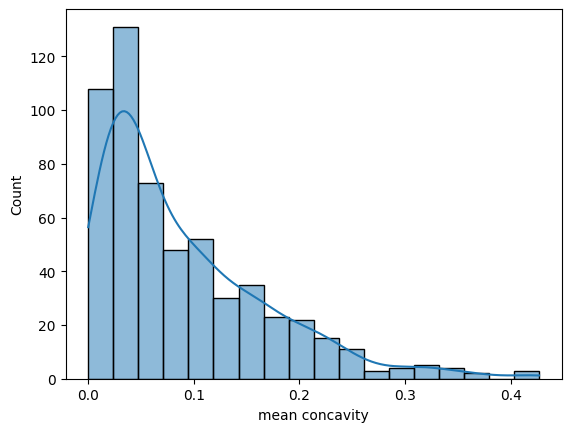

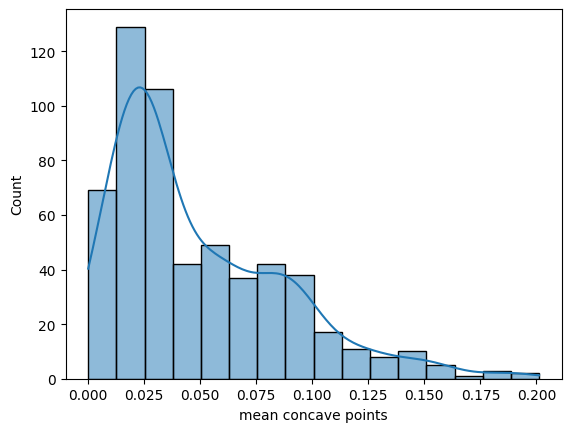

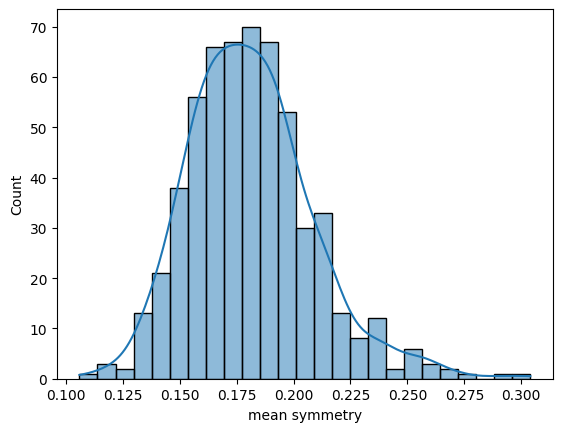

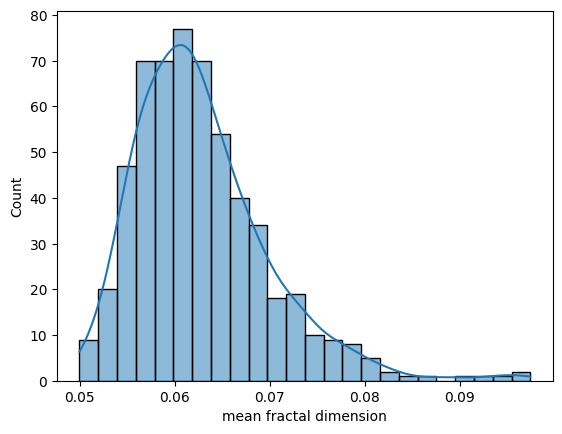

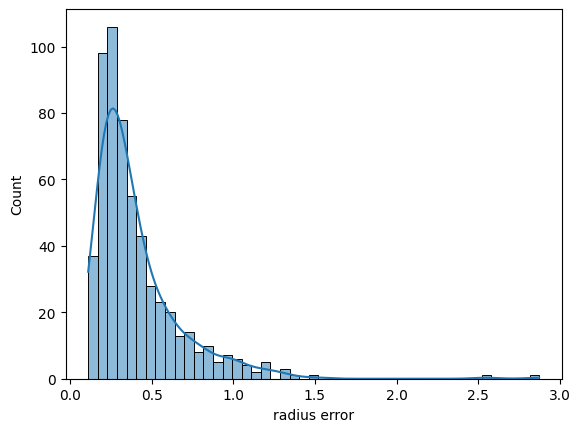

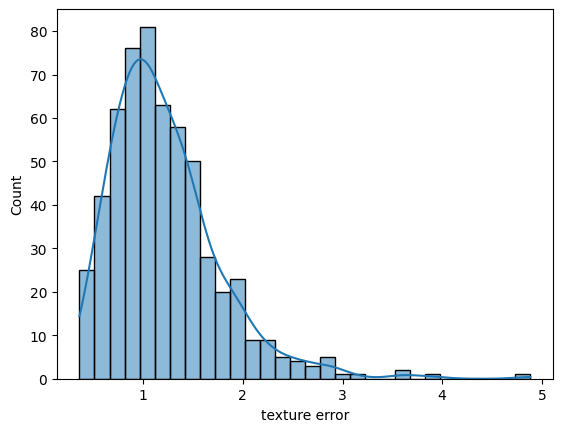

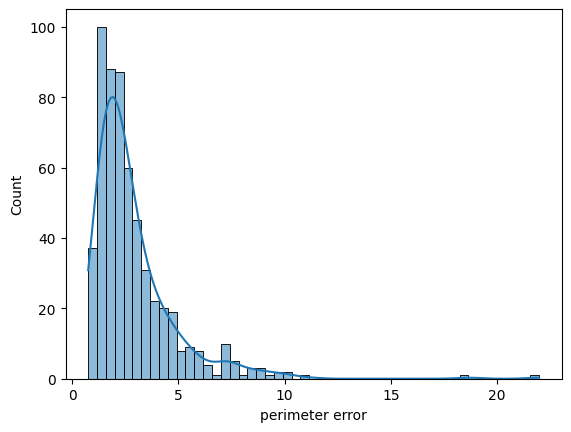

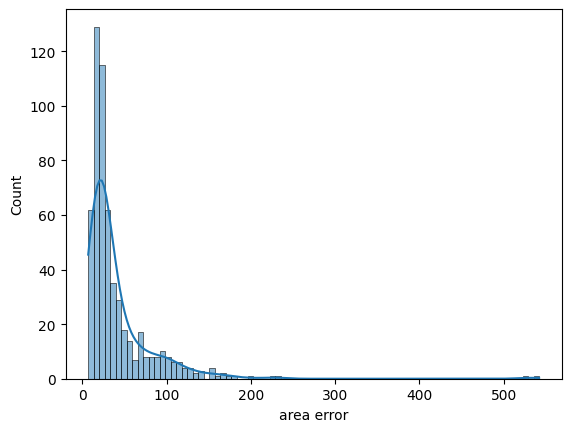

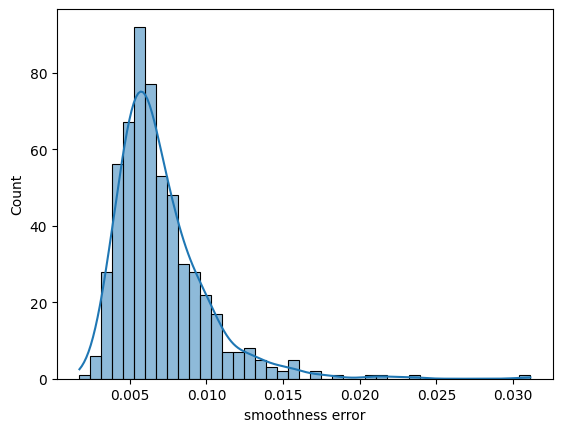

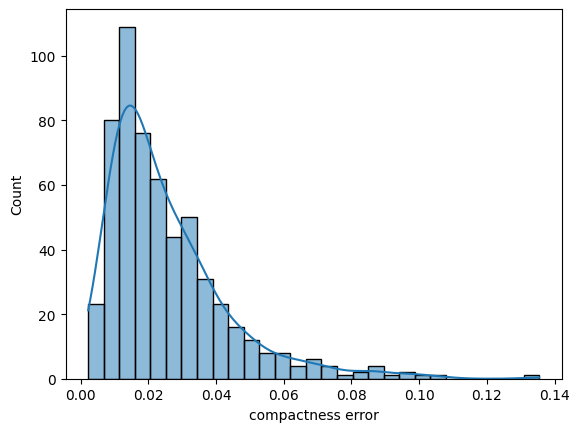

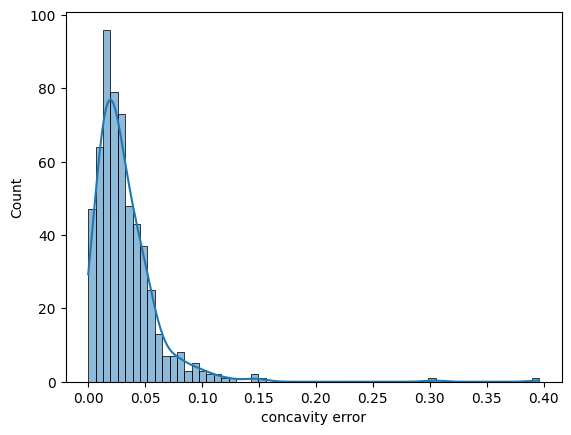

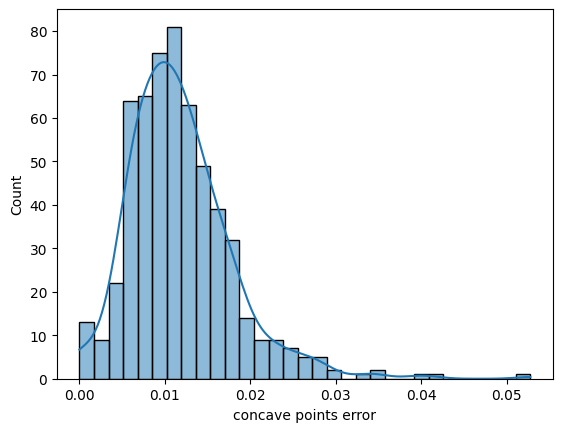

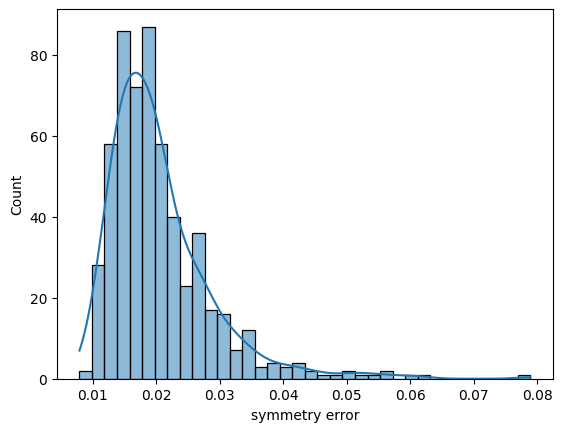

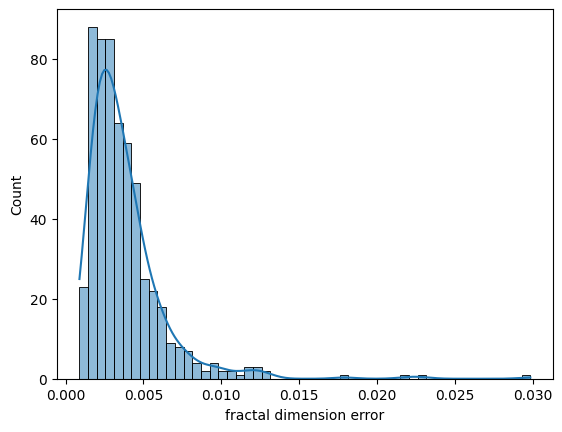

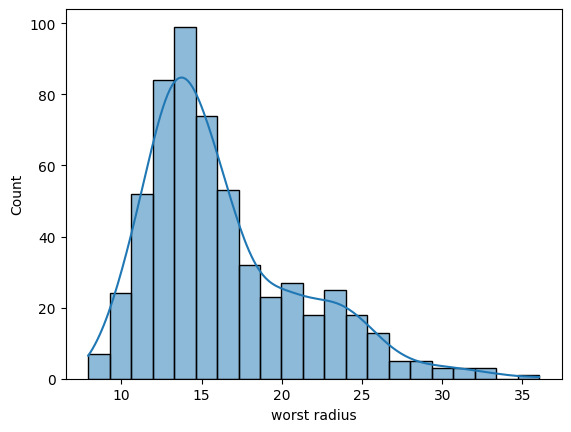

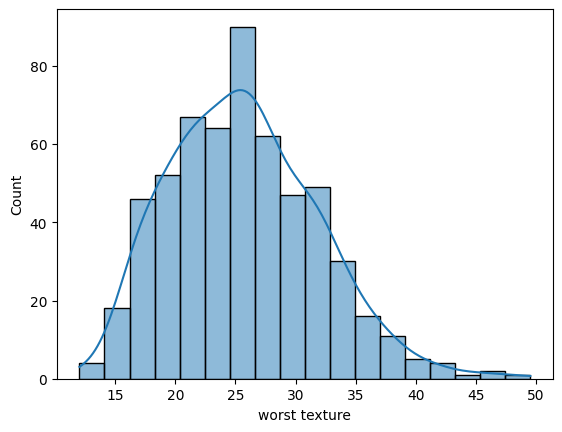

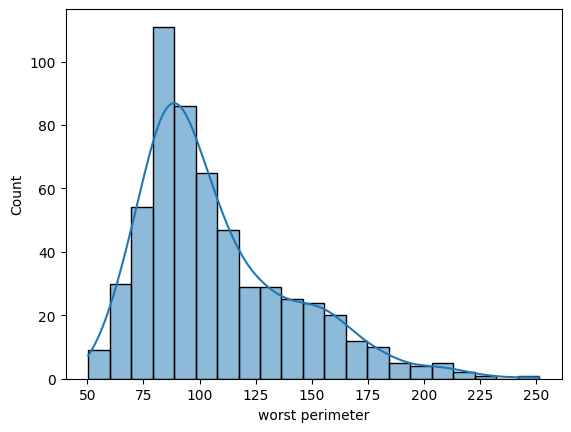

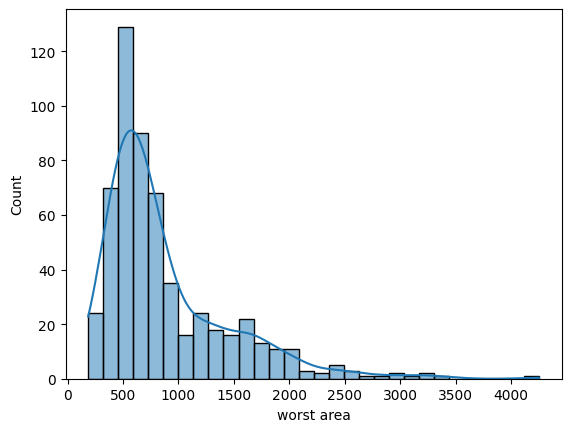

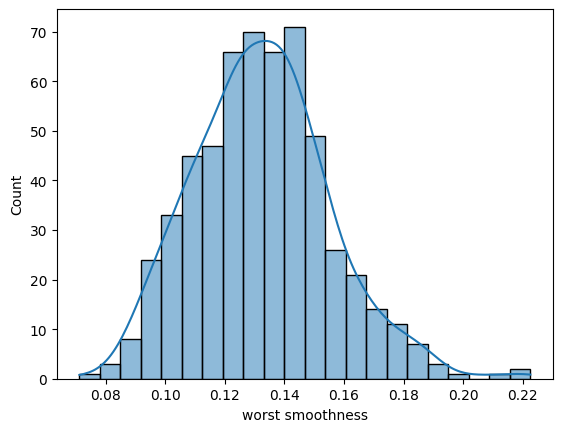

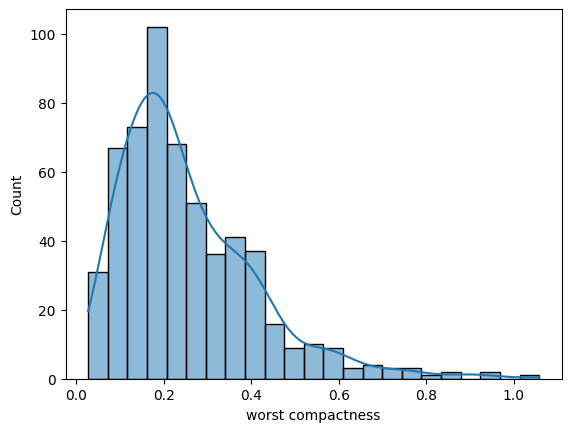

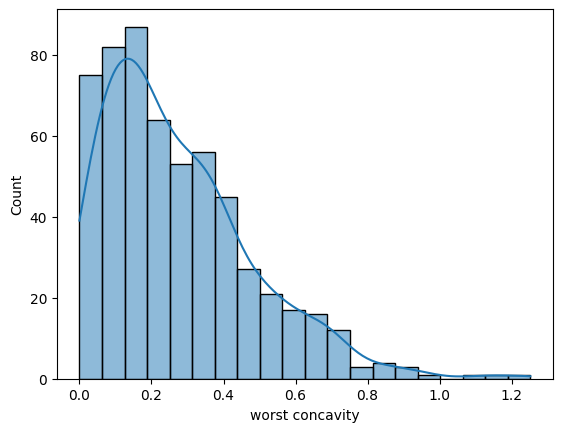

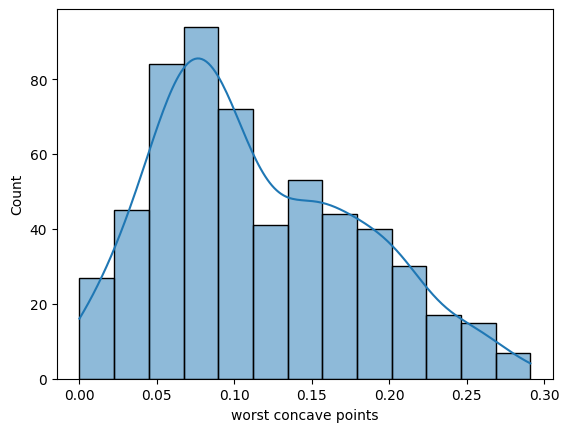

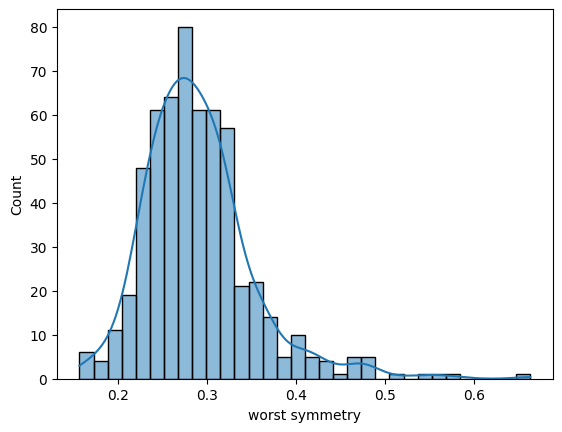

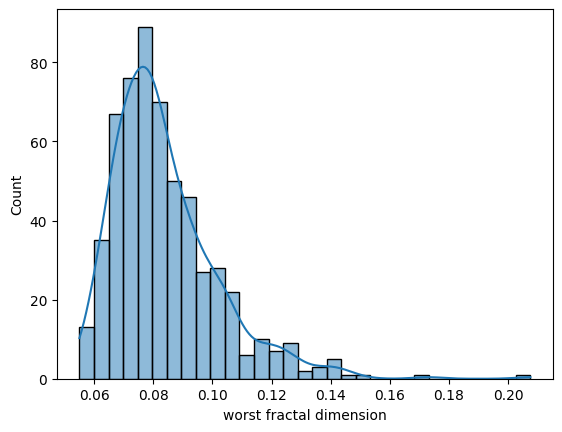

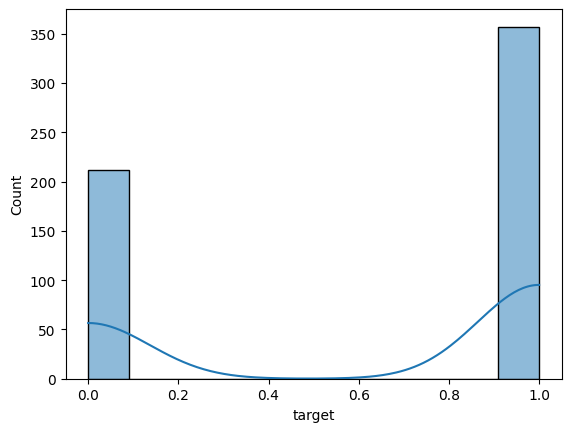

In [13]:
#Distribution of the data
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [14]:
#Dependent and independent varibles
X = df.drop(labels=["target"],axis=1)
y = df["target"]

In [15]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [17]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_train_scaled_pca

array([[-4.30770177e+00, -1.87876301e+00, -9.63362981e-02, ...,
         1.25365849e-02,  1.71293388e-02,  2.84540361e-03],
       [ 2.37019450e+00,  2.00323118e+00, -2.41257605e+00, ...,
        -3.71737930e-02,  2.40654157e-02,  3.53777930e-03],
       [-1.92867443e+00, -2.29950203e-01,  6.99842755e-01, ...,
        -8.94755369e-03, -3.25798169e-03, -1.06138111e-02],
       ...,
       [-4.49788441e+00, -3.07995377e+00, -5.84939205e-02, ...,
         1.38563576e-02,  4.33820436e-03,  1.39044856e-02],
       [ 7.77088993e-01,  5.39144742e-01, -2.77792141e+00, ...,
        -2.76351100e-02, -2.09607478e-02,  4.21914127e-03],
       [-3.37081968e+00, -1.33023097e+00, -1.02245303e-01, ...,
        -3.52490937e-03,  1.30103137e-02, -2.96216057e-04]])

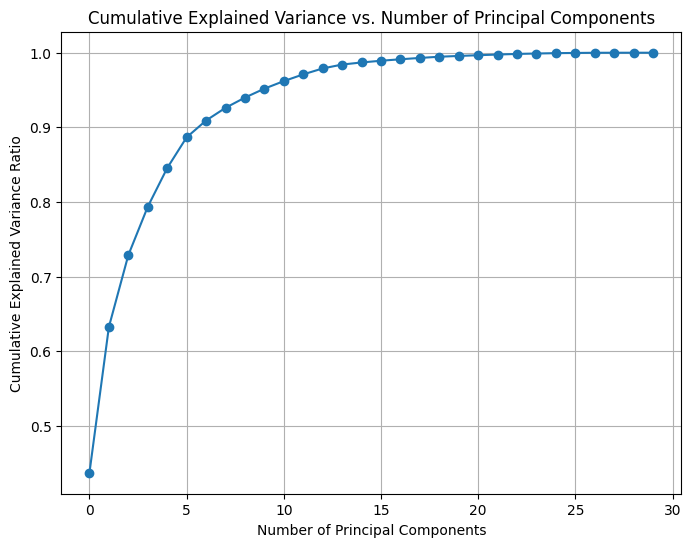

In [19]:
# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [20]:
cumulative_variance_ratio

array([0.4373648 , 0.6326785 , 0.72885854, 0.79368651, 0.84549364,
       0.88667815, 0.90919944, 0.9261842 , 0.9398914 , 0.95186197,
       0.96197811, 0.97099212, 0.97893521, 0.98414429, 0.98695271,
       0.98926031, 0.9912229 , 0.9930126 , 0.99463042, 0.99567947,
       0.99665899, 0.99754817, 0.99837553, 0.99894028, 0.99943168,
       0.99969702, 0.99992302, 0.99997118, 0.99999606, 1.        ])

In [21]:
df = df.rename(columns={
    'mean radius': 'mean_radius',
    'mean texture': 'mean_texture',
    'mean perimeter': 'mean_perimeter',
    'mean area': 'mean_area',
    'mean smoothness': 'mean_smoothness',
    'mean compactness': 'mean_compactness',
    'mean concavity': 'mean_concavity',
    'mean concave points': 'mean_concave_points',
    'mean symmetry': 'mean_symmetry',
    'mean fractal dimension': 'mean_fractal_dimension',
    'radius error': 'radius_error',
    'texture error': 'texture_error',
    'perimeter error': 'perimeter_error',
    'area error': 'area_error',
    'smoothness error': 'smoothness_error',
    'compactness error': 'compactness_error',
    'concavity error': 'concavity_error',
    'concave points error': 'concave_points_error',
    'symmetry error': 'symmetry_error',
    'fractal dimension error': 'fractal_dimension_error',
    'worst radius': 'worst_radius',
    'worst texture': 'worst_texture',
    'worst perimeter': 'worst_perimeter',
    'worst area': 'worst_area',
    'worst smoothness': 'worst_smoothness',
    'worst compactness': 'worst_compactness',
    'worst concavity': 'worst_concavity',
    'worst concave points': 'worst_concave_points',
    'worst symmetry': 'worst_symmetry',
    'worst fractal dimension': 'worst_fractal_dimension'
    })

In [22]:
df.to_csv('./datasets/breast_cancer_dataset.csv', index=False)

# Observation
- We must retain the first 5 principal components as after which the variance captured is neglegible